# Exploratory Analysis & Data Visualization
### Kanja Saha



## Import Data
<a id='import_data'></a>
In general, import all needed libraries before importing data. If this is a learning execise, import libraries in each step as needed. This is will give a better understanding of the libraries. 

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
from IPython.display import display

# Load the dataset into pandas dataframe
raw_data = pd.read_excel("Online_Retail.csv")

In [2]:
o1= ("Dataset has {} rows(samples) with {} columns(features) each.".format(*raw_data.shape))
Observation=[]
Observation.append(o1)


print(o1)

Dataset has 541909 rows(samples) with 8 columns(features) each.


In [3]:
# display the top 5 rows of the dataset
raw_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [5]:
from sklearn import preprocessing

print('Is there null value in the data frame? {}.' .format('Yes' if (raw_data.isnull().values.any()) else 'No' ))
if (raw_data.isnull().values.any()):
    print(raw_data.isnull().sum())
    
raw_data=raw_data.dropna(subset=['CustomerID'])

raw_data[raw_data['CustomerID'].isnull()].head()


Is there null value in the data frame? Yes.
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [6]:
#summary of dataset's distribution
import numpy as np
raw_data['CustomerID'] = raw_data['CustomerID'].astype(np.int64)
raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Observation
For RFM analysis, the data above needs to be transformed to Recency, Frequency and Monetization score. From the above data, min value of Quantity shows negative, which implies returns.

So, lets look at some observation where quanity is less than 0.

In [7]:
#items with negative quantity implies returned items, and 0 implies no purchase
raw_data[raw_data.Quantity<=0].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


Pick one customer with negative quantity and see all transaction for that account

In [8]:
r=raw_data[(raw_data.CustomerID==17548) & (raw_data.StockCode==21484)]
r.sort_values(['Description','Quantity','InvoiceDate'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom


In [9]:
from datetime import datetime
import numpy as np
#calculate recency for each transaction
currentDT = pd.to_datetime(datetime.now().date())
raw_data['Recency']= (pd.to_datetime(datetime.now().date())-pd.to_datetime(raw_data.InvoiceDate)).dt.days

# store the returned items in a dataset


#Calculate revenue(monetization) generated by each customer
def total_price(raw_data):
    x = (raw_data.Quantity * raw_data.UnitPrice)
    return np.sum(x)


data=pd.DataFrame()


data['monetization']=raw_data.groupby('CustomerID').apply(total_price)
#get the recency of the account
data['recency']=raw_data.groupby('CustomerID').agg({'Recency': np.min})
#get the total number of transactions
data['return_frequency']=raw_data[raw_data.Quantity<0].groupby('CustomerID').Recency.nunique()
data['purchase_frequency']=raw_data[raw_data.Quantity>0].groupby('CustomerID').Recency.nunique()
data.head()
data['frequency']=data['purchase_frequency'].fillna(data['return_frequency'])

data.drop(['purchase_frequency','return_frequency'],axis=1,inplace=True)
#save customer_id which is an index in the data frame 
CustomerID=data.index
# show summary of the data distribution
data.head()

,monetization,recency,frequency
CustomerID,,,
12346,0.00,2749,1.0
12347,4310.00,2426,7.0
12348,1797.24,2499,4.0
12349,1757.55,2442,1.0
12350,334.40,2734,1.0


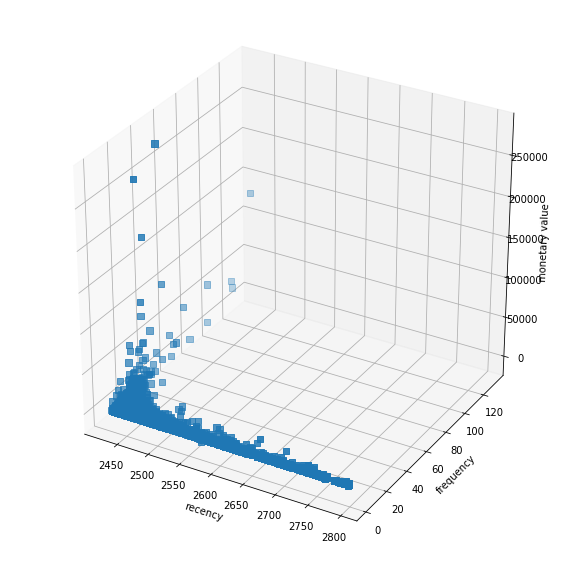

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, xlabel='recency',ylabel='frequency',zlabel='monetary value',projection='3d')
x = np.array(data['recency'])
y = np.array(data['frequency'])
z = np.array(data['monetization'])

ax.scatter(x,y,z, marker="s",  s=40)

plt.show()


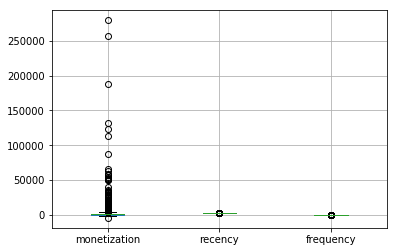

In [11]:
import matplotlib.pyplot as plt
data.boxplot()

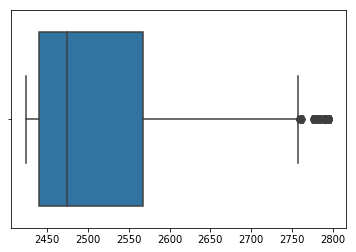

In [12]:
import seaborn as sns
sns.boxplot(x)


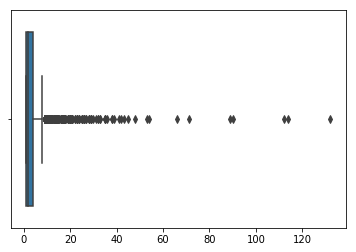

In [13]:
sns.boxplot(y)


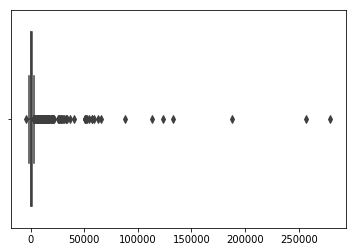

In [14]:
sns.boxplot(z)


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [15]:
import preprocess_data as o
data,outliers,message=o.remove_outliers(data,False)
print (message)
data.describe()

268 (6.13%) data points considered outliers from the dataset of 4372. Outlier not dropped from dataset.


,monetization,recency,frequency
count,4372.000000,4372.000000,4372.000000
mean,1898.459701,2515.581199,3.842864
std,8219.345141,100.772139,5.935231
min,-4287.630000,2424.000000,1.000000
25%,293.362500,2440.000000,1.000000
50%,648.075000,2474.000000,2.000000
75%,1611.725000,2567.000000,4.000000
max,279489.020000,2797.000000,132.000000


In [16]:
import preprocess_data as o
data,outliers,message=o.remove_outliers(data,True)
print (message)
data.describe()

268 (6.13%) data points considered outliers from the dataset of 4372. Outlier Dropped from dataset.


,monetization,recency,frequency
count,4104.000000,4104.000000,4104.000000
mean,1039.087333,2520.849415,2.842593
std,1355.297046,101.722519,2.415136
min,-4287.630000,2424.000000,1.000000
25%,274.420000,2443.000000,1.000000
50%,599.790000,2477.000000,2.000000
75%,1330.685000,2578.000000,4.000000
max,21535.900000,2797.000000,35.000000


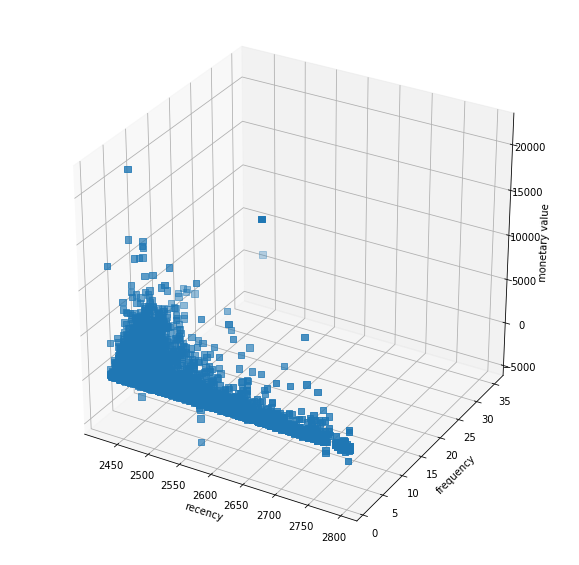

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, xlabel='recency',ylabel='frequency',zlabel='monetary value',projection='3d')
x = np.array(data['recency'])
y = np.array(data['frequency'])
z = np.array(data['monetization'])

ax.scatter(x,y,z, marker="s",  s=40)

plt.show()

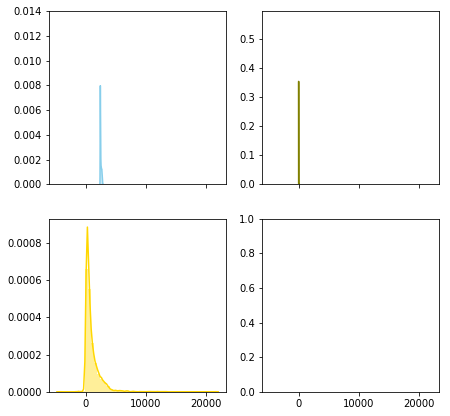

In [18]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( x , color="skyblue", ax=axes[0, 0])
sns.distplot( y , color="olive", ax=axes[0, 1])
sns.distplot(z , color="gold", ax=axes[1, 0])


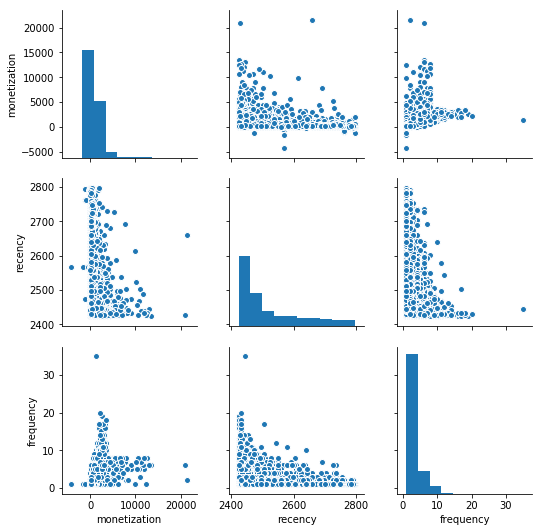

In [19]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFF3F3A320>,
      dtype=object)

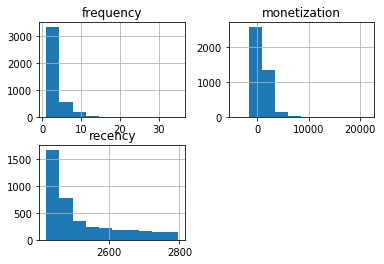

In [20]:
data.hist()

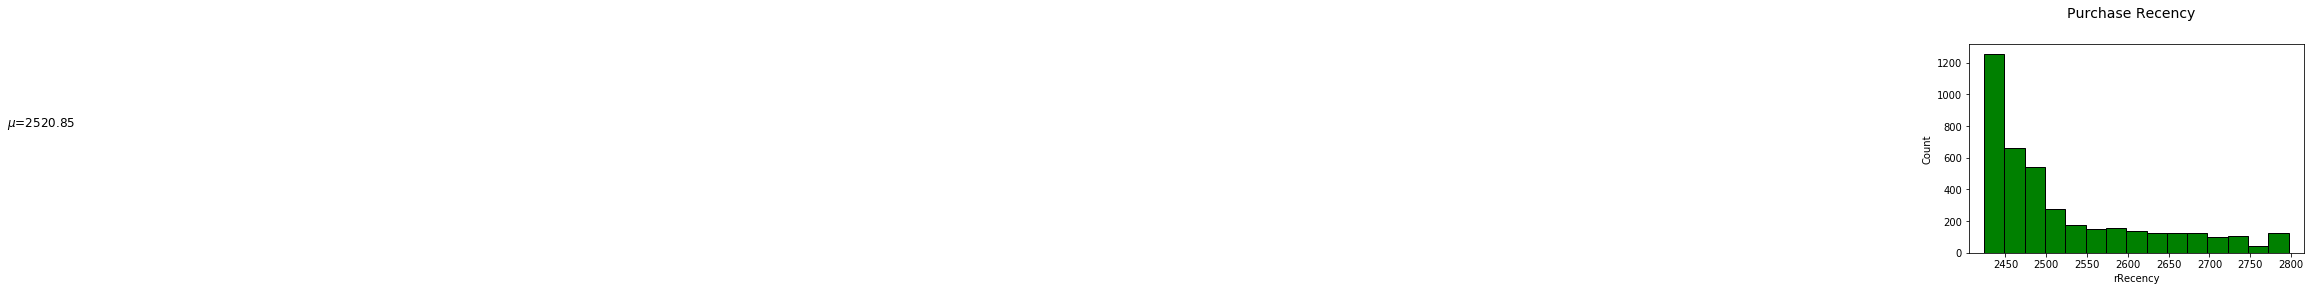

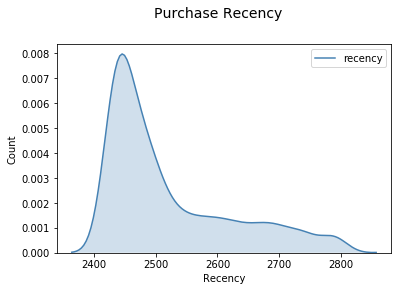

In [21]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Purchase Recency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("rRecency")
ax.set_ylabel("Count") 
ax.text(1.2, 800, r'$\mu$='+str(round(data['recency'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(data['recency'], color='green', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Purchase Recency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Recency")
ax1.set_ylabel("Count") 
sns.kdeplot(data['recency'], ax=ax1, shade=True, color='steelblue')
                                    


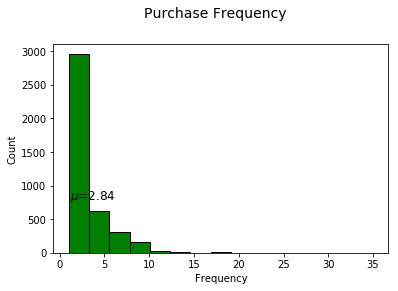

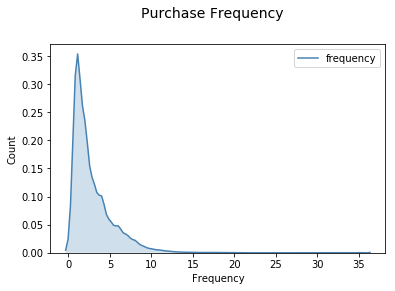

In [22]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Purchase Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Frequency")
ax.set_ylabel("Count") 
ax.text(1.2, 800, r'$\mu$='+str(round(data['frequency'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(data['frequency'], color='green', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Purchase Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Count") 
sns.kdeplot(data['frequency'], ax=ax1, shade=True, color='steelblue')
                                    

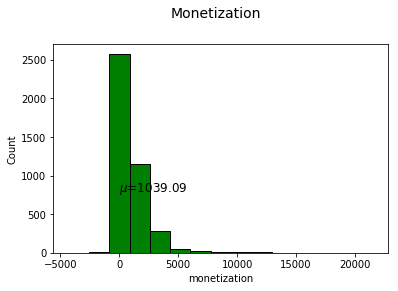

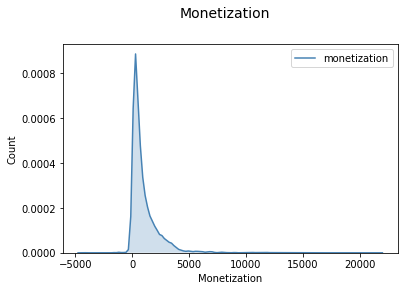

In [23]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Monetization", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("monetization")
ax.set_ylabel("Count") 
ax.text(1.2, 800, r'$\mu$='+str(round(data['monetization'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(data['monetization'], color='green', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Monetization", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Monetization")
ax1.set_ylabel("Count") 
sns.kdeplot(data['monetization'], ax=ax1, shade=True, color='steelblue')

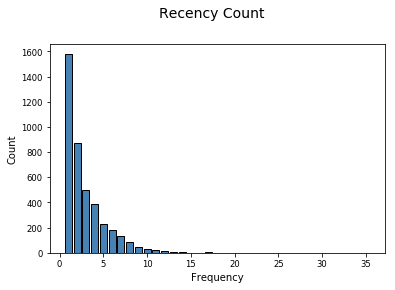

In [24]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Recency Count", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Frequency")
ax.set_ylabel("Count") 
w_q = data['frequency'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

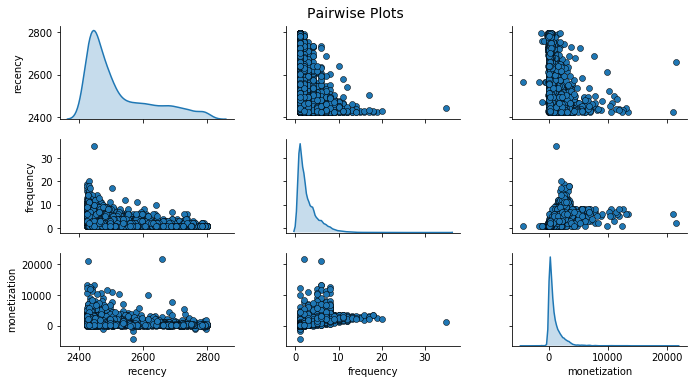

In [25]:
# Pair-wise Scatter Plots
cols = ['recency', 'frequency', 'monetization']
pp = sns.pairplot(data[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plots', fontsize=14)

In [26]:
#NORMALIZE DATA FOR KMEANS
import preprocess_data as o
n_data=o.normalize_data(data)
#print (message)


n_data.head(5)
n_data.describe()

,monetization,recency,frequency
count,4104.000000,4104.000000,4104.000000
mean,0.307473,0.907379,0.000951
std,0.249985,0.140180,0.000712
min,-0.857897,0.114678,0.000079
25%,0.107426,0.880148,0.000395
50%,0.230722,0.972776,0.000772
75%,0.473975,0.994140,0.001216
max,0.993403,1.000000,0.012646


### Aprroximating clusters

For K-means n_clusters = 2. The average silhouette_score is : 0.6437226768377119
For K-means n_clusters = 3. The average silhouette_score is : 0.5445815374361989
For K-means n_clusters = 4. The average silhouette_score is : 0.4850663213573863
For K-means n_clusters = 5. The average silhouette_score is : 0.45612644062814584
For K-means n_clusters = 6. The average silhouette_score is : 0.4566218032288349
For K-means n_clusters = 7. The average silhouette_score is : 0.3993710623407376
For K-means n_clusters = 8. The average silhouette_score is : 0.3909281475178738
For K-means n_clusters = 9. The average silhouette_score is : 0.39695695590232905
For K-means n_clusters = 10. The average silhouette_score is : 0.39520654066481664
For K-means n_clusters = 11. The average silhouette_score is : 0.3651270920413784
For K-means n_clusters = 12. The average silhouette_score is : 0.34004724006846687
For K-means n_clusters = 13. The average silhouette_score is : 0.35681609122901425
For K-means n_clust

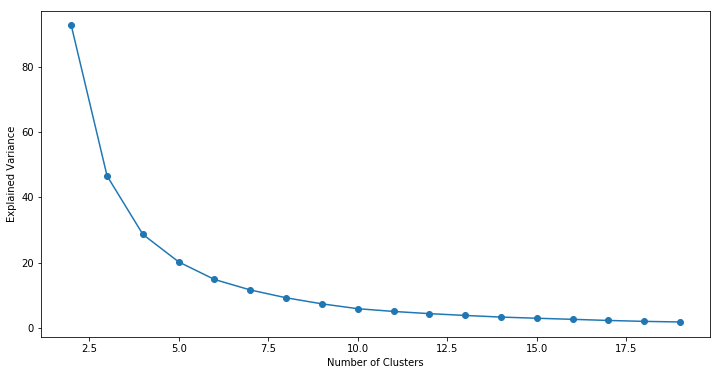

In [27]:
#Elbow method & silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Pretty display for notebooks
%matplotlib inline

cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(n_data)
    preds = clusters.predict(n_data)
    cluster_errors.append( clusters.inertia_ )
    score = silhouette_score(data, preds, metric='euclidean')
    print ("For K-means n_clusters = {}. The average silhouette_score is : {}".format(num_clusters, score))

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

plt.figure(figsize=(12,6))
plt.ylabel('Explained Variance')
plt.xlabel('Number of Clusters')
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Looking at the chart, there may be 5 to 7 clusters in the dataset

### Find nearestneighordistance similar to DistanceToNearestNeighborDriver  in Spark

(array([753., 622., 355., 225., 181., 160., 203., 257., 254., 149.,  83.,
         83.,  54.,  80.,  73.,  81.,  56.,  60.,  54.,  34.,  23.,  18.,
         35.,  23.,  12.,  14.,   8.,  14.,   7.,  14.,   5.,   8.,   9.,
          4.,   4.,   2.,   5.,   6.,   7.,   1.,   4.,   0.,   2.,   5.,
          1.,   1.,   3.,   2.,   1.,   1.,   0.,   1.,   0.,   2.,   1.,
          2.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   3.,   0.,   2.,
          0.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0., 

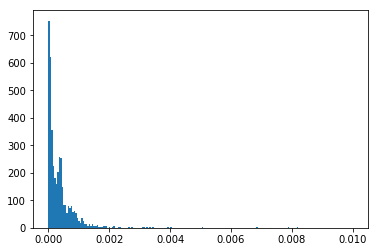

In [28]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=2, algorithm='kd_tree').fit(n_data)
#algorithm='ball_tree'
distances, indices = nbrs.kneighbors(n_data)
nn_distances=distances[:,1]

import numpy as np
import matplotlib.pyplot as plt

plt.hist(nn_distances,range=[0,.01], bins='auto')
#len(nn_distances[nn_distances<.0005])
#percent=(3500/4234)
#percent
#.0025


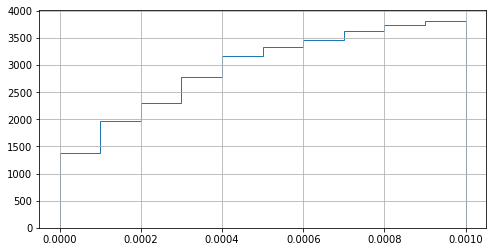

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(nn_distances, histtype='step',range=[0,.001], cumulative=True, label='Empirical')

# tidy up the figure
ax.grid(True)
plt.show()

In [30]:
from scipy import stats
stats.percentileofscore(nn_distances,.001)

93.05555555555556

This implies that 93% of the observations have their nearest neighor within .001 euclidean distance unit. So choosing .001 as the epsilon will cover 93% of the observations

In [34]:
from scipy import stats

##np.histogram(nn_distances)
#np.savetxt("nn_distances.csv", nn_distances, delimiter=",")
#stats.describe(nn_distances)

import numpy as np
import scipy.spatial as spatial

def getNeighborCount_spatial_cKDTree(data,k):
    neighorcount=0
    nn_minpoints=[]
    for observation in range(len(data)):
        point_tree = spatial.cKDTree(data)
        neighors_within_dist_k=point_tree.query_ball_point(data.loc[observation], k)
        neighorcount=len(neighors_within_dist_k)
        #data.loc[observation]['neighorcount'] =   neighorcount
        #display(neighorcount)
        #display(data.loc[observation])
        nn_minpoints.append(neighorcount)
        
    return nn_minpoints

n_data.assign(neighorcount=0)
nn_minpoints = getNeighborCount_spatial_cKDTree(n_data,.001)
#nn_minpoints=n_data.groupby("neighorcount").size()

(array([650., 595., 383., 278., 149., 276., 217., 164., 196.,  84., 210.,
        195., 195., 192.,  75., 118.,  83.,  34.,  10.]),
 array([ 1.        ,  2.78947368,  4.57894737,  6.36842105,  8.15789474,
         9.94736842, 11.73684211, 13.52631579, 15.31578947, 17.10526316,
        18.89473684, 20.68421053, 22.47368421, 24.26315789, 26.05263158,
        27.84210526, 29.63157895, 31.42105263, 33.21052632, 35.        ]),
 <a list of 19 Patch objects>)

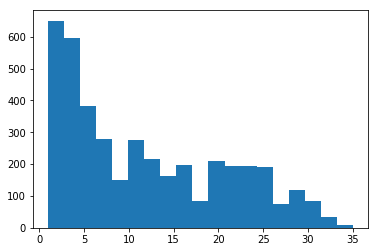

In [35]:
plt.hist(nn_minpoints, bins='auto')

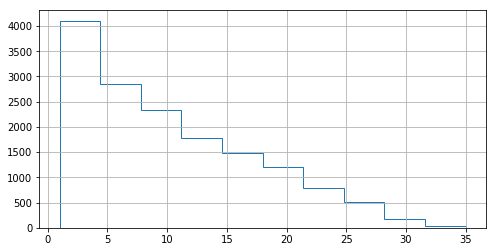

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(nn_minpoints, histtype='step', cumulative=-1, label='Empirical')

# tidy up the figure
ax.grid(True)
plt.show()

In [43]:
from scipy import stats
stats.percentileofscore(nn_minpoints,5)

33.065302144249515

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np


data = [go.Histogram(x=nn_distances,
                     cumulative=dict(enabled=True))]

py.iplot(data, filename='cumulative histogram')

# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns


# seaborn histogram
sns.distplot(nn_distances)


import seaborn as sns, numpy as np
sns.set(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)